In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Roman"]})

In [15]:
def normal(x, mu, sigma):
    return 1.0/(sigma * (2*np.pi)**0.5) * np.exp(-0.5*((x-mu)/sigma)**2)

In [22]:
def plot_conv_hist(ax, data, alpha, color):
    convs = data[alpha]

    n, bins, patches = ax.hist(convs, bins=15, density=False)
    x_c = np.linspace(0, 1, 300)
    mu = np.mean(convs)
    sigma = np.std(convs)
    g = normal(x_c, mu, sigma)
    ax.plot(x_c, g / np.max(g) * np.max(n), color, label=f'$\\mu$={mu:.3f}, $\\sigma$={sigma:.3f}')
    #ax.set_title(f'Convergence of Lloyd seeds, N={len(convs)}, $\\alpha$={alpha}')
    ax.set_xlim(0,1)
    ax.legend()
    ax.text(mu, np.max(n) + 2, f'$\\alpha={alpha}$')

In [23]:
with open('lloyd_hist.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.keys())

dict_keys([0.027, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5])


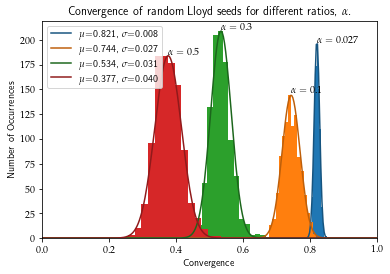

In [24]:
#fig, ax = plt.subplots(1, 5, figsize=(7,5))
plt.figure(figsize=(6, 4))
ax = plt.gca()
#for key in data.keys():
#    plot_conv_hist(ax, data, key, '#16547f')
plot_conv_hist(ax, data, .027, '#16547f')
plot_conv_hist(ax, data, 0.1, '#be5f0a')
plot_conv_hist(ax, data, 0.3, '#1c661c')
plot_conv_hist(ax, data, 0.5, '#901a1b')
plt.xlabel('Convergence')
plt.ylabel('Number of Occurrences')
plt.title('Convergence of random Lloyd seeds for different ratios, $\\alpha$.')
plt.savefig('lloyd_aniso.pdf')